In [41]:
import numpy as np

import matplotlib.pyplot as plt

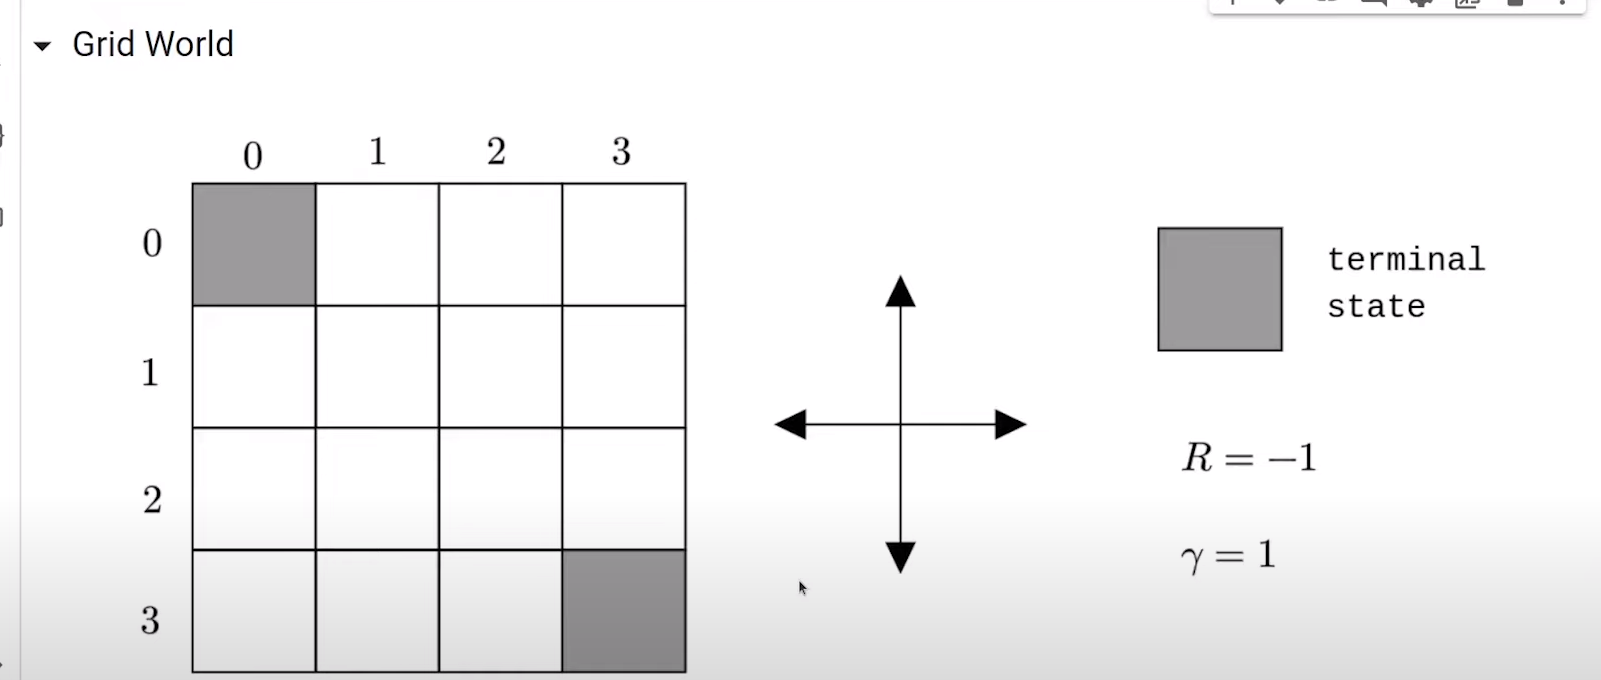

In [59]:
# Grid World

m,n = 4,4
S = [(r,c) for r in range(m) for c in range(n)]

A = ['north','south','east','west']

acount = len(A) # number of actions

terminal = [(3,3)]


gamma = 1

In [60]:
# transistions

def transistions(s,a,s_next):
    r,c = s
    if a == 'north':
        r = r if r == 0 else r-1
    if a == 'south':
        r = r if r == m-1 else r + 1
    if a == 'west':
        c = c if c == 0 else c-1
    if a == 'east':
        c = c if c == n-1 else c + 1
        
    prob = 1 if (r,c) == s_next else 0
    
    reward = -1
    
    return prob,reward

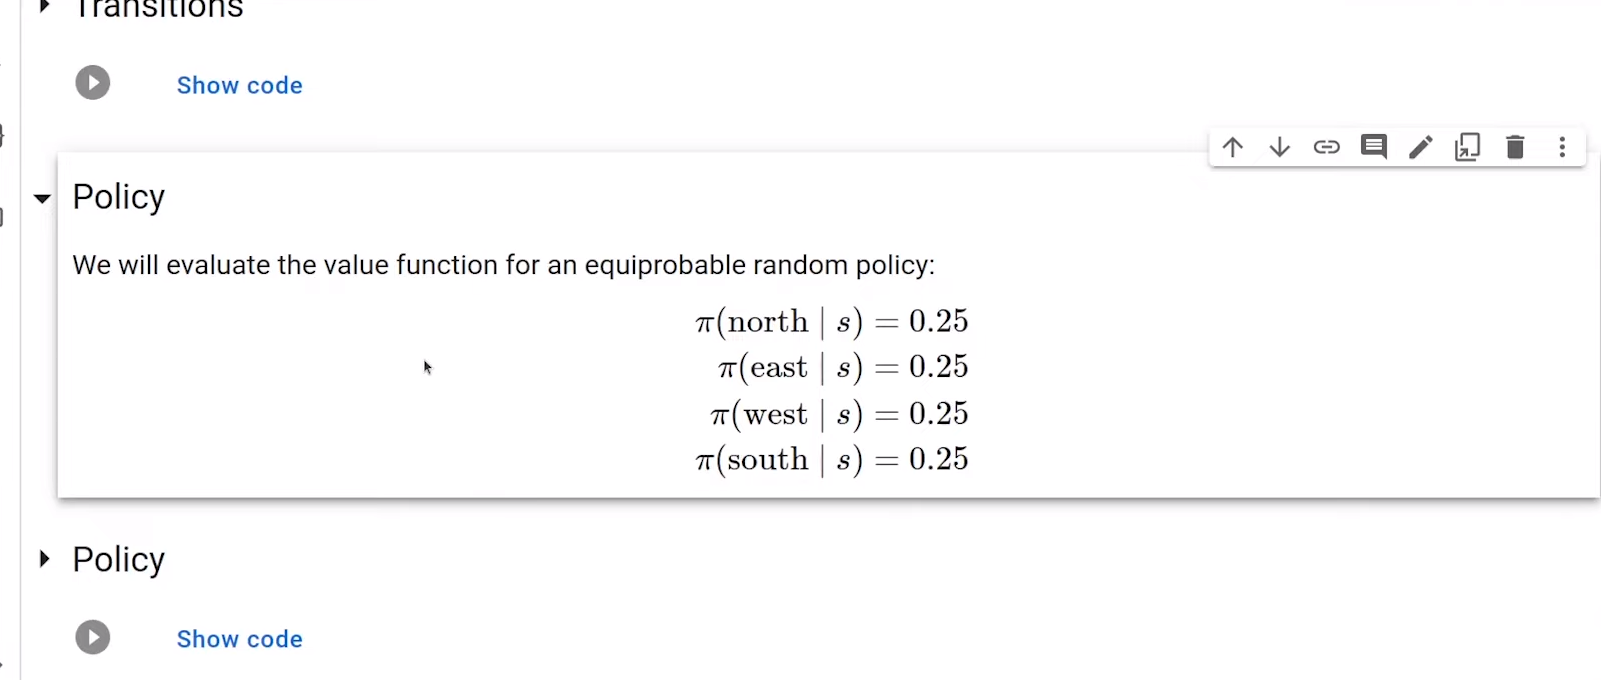

In [61]:
pi = {s:{a:0.25 for a in A} for s in S}
pi

{(0, 0): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (0, 1): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (0, 2): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (0, 3): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (1, 0): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (1, 1): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (1, 2): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (1, 3): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (2, 0): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (2, 1): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (2, 2): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (2, 3): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (3, 0): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (3, 1): {'north': 0.25, 'south': 0.25, 'east': 0.25, 'west': 0.25},
 (3, 2): {'north': 0.25, 'south': 

# the Policy evaluaion



In [62]:
def to_numpy(v,m,n):
    vnum = np.zeros((m,n))
    for s in v:
        vnum[s] = v[s]
    return vnum

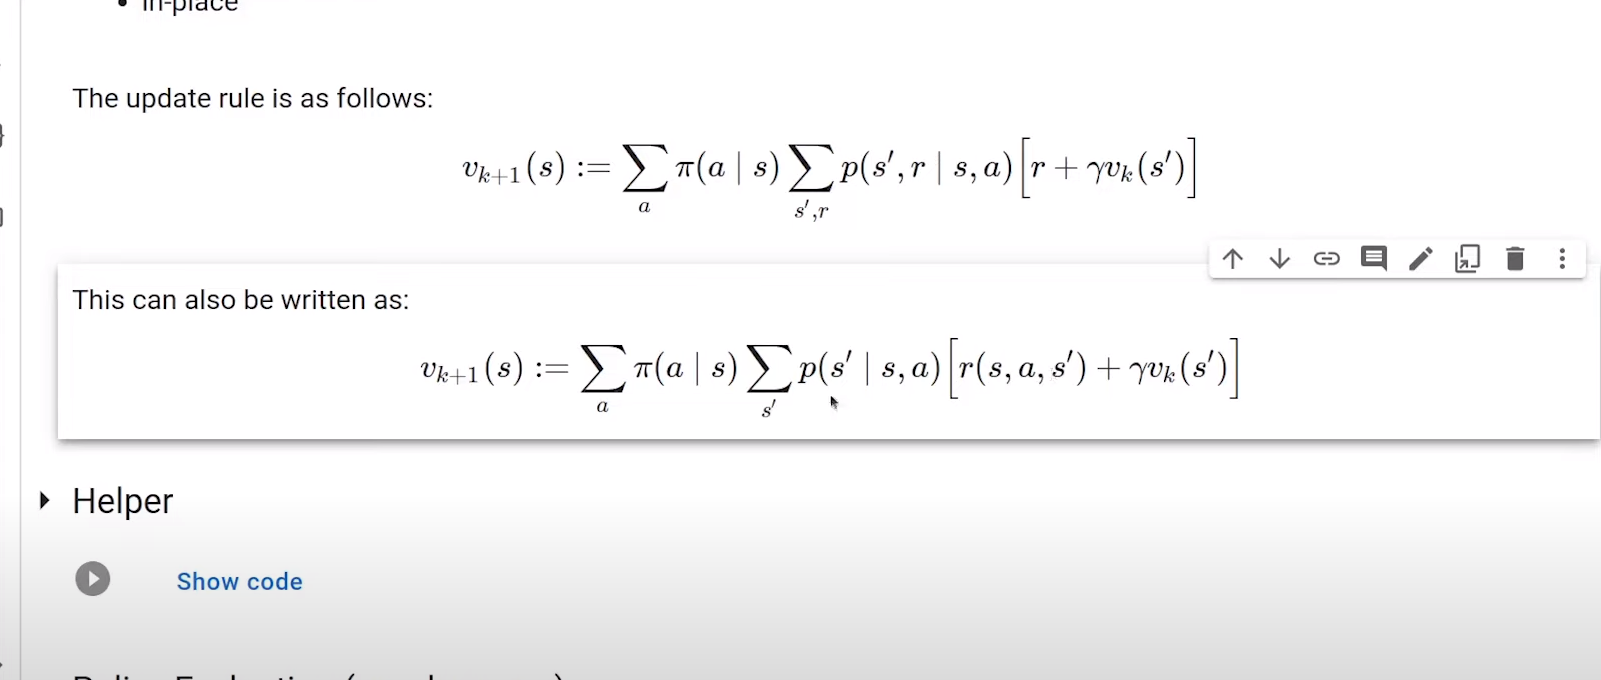

In [63]:
# Synchronus
thetha = 1e-3
delta = thetha + 1
v = { s : 0 for s in S} # intitilisation
iter = 0

while delta >= thetha:
    iter += 1
    v_next = {s:0 for s in S}
    delta = 0
    for s in S:
        if s in terminal:# do not disturb terminl state
            continue
        
        for a in A:
            for s_next in S:
                prob , reward = transistions(s,a,s_next)
                v_next[s] += pi[s][a]*prob*(reward + gamma * v[s_next])
                
        delta = max(delta, abs(v[s] - v_next[s]))
        
    v = v_next.copy()
    
v = {s:np.round(v[s]) for s in S}

print(iter)
print(to_numpy(v,m,n))
        
        
    

356
[[-59. -57. -54. -52.]
 [-57. -55. -50. -45.]
 [-54. -50. -41. -30.]
 [-52. -45. -30.   0.]]


In [64]:
v


{(0, 0): -59.0,
 (0, 1): -57.0,
 (0, 2): -54.0,
 (0, 3): -52.0,
 (1, 0): -57.0,
 (1, 1): -55.0,
 (1, 2): -50.0,
 (1, 3): -45.0,
 (2, 0): -54.0,
 (2, 1): -50.0,
 (2, 2): -41.0,
 (2, 3): -30.0,
 (3, 0): -52.0,
 (3, 1): -45.0,
 (3, 2): -30.0,
 (3, 3): 0}

In [65]:
#in place
def evaluate(pi):
    thetha = 1e-3
    delta = thetha + 1
    v = { s : 0 for s in S} # intitilisation
    iter = 0
    
    while delta >= thetha:
        iter += 1
        #v_next = {s:0 for s in S}
        delta = 0
        for s in S:
            vs = 0
            if s in terminal:# do not disturb terminl state
                continue
        
            for a in A:
                for s_next in S:
                    prob , reward = transistions(s,a,s_next)
                    vs += pi[s][a]*prob*(reward + gamma * v[s_next])

            delta = max(delta, abs(v[s] - vs))
            v[s] = vs
    
    
    return v,iter
    

    
v , iter = evaluate(pi)
v = {s:np.round(v[s]) for s in S}

print(iter)
print(to_numpy(v,m,n))
# reason for less iteration in in-place we use newly computed vs which are more accurate or recently updated
# so less iteration

    



240
[[-59. -57. -54. -52.]
 [-57. -55. -50. -45.]
 [-54. -50. -41. -30.]
 [-52. -45. -30.   0.]]


In [66]:
# policy improvment

def improve(v):
    pi_next = {s:{a:0 for a in A} for s in S}
    q = {s:{a:0 for a in A} for s in S}
    
    for s in S:
        for a in A:
            for s_next in S:
                prob, reward = transistions(s,a,s_next)
                q[s][a] += prob*(reward+gamma*v[s_next])
        amax = max([(a,q[s][a]) for a in A],key  = lambda x:x[1])[0] # breaking ties order wise
        pi_next[s][amax] = 1 # make it deterministic that is prob for that action is  1
            
    return pi_next
    
pi_next = improve(v)
#break ties consistently          
                
                
                

In [67]:
# policy iteration


pi_next = {s:{a:1/acount for a in A} for s in S}
pi = {s : { a: 1 if a == 'north' else 0 for a in A } for s in S}

iter = 0 
while not np.array_equal(pi,pi_next):
    pi = pi_next.copy()
    v, _ = evaluate(pi)
    pi_next = improve(v)
    iter += 1
    
    
    

In [68]:
iter

3

In [69]:
to_numpy(v,m,n)

array([[-6., -5., -4., -3.],
       [-5., -4., -3., -2.],
       [-4., -3., -2., -1.],
       [-3., -2., -1.,  0.]])

In [70]:
# optimal policies

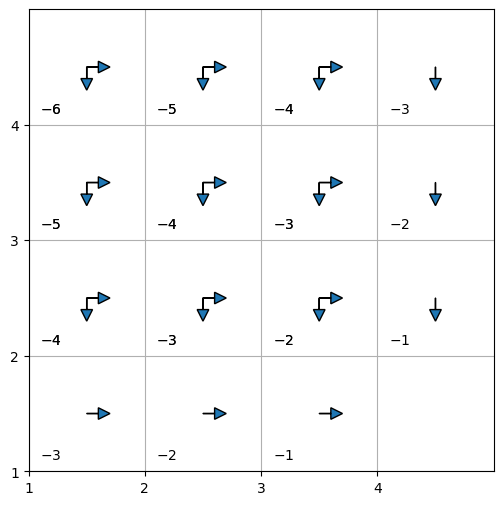

In [71]:
plt.rcParams['figure.figsize'] = [6,6]
ext = 0.1
arrow_map = {'north':(0,ext),
             'south':(0,-ext),
             'east':(ext,0),
             'west':(-ext,0)
            }
q = {s:{a:0 for a in A} for s in S}
for s in S:
    if s in terminal:
        continue
    for a in A:
        for s_next in S:
            prob,reward = transistions(s,a,s_next)
            q[s][a] += prob*(reward + gamma*v[s_next])
            
    maxq = max([q[s][a] for a in A])
    opt_acts = [a for a in A if q[s][a] == maxq] # for all max actions
    for a in opt_acts:
        r,c = s
        x,y = c + 0.5, m-1-r+0.5,
        plt.arrow(x,y,arrow_map[a][0], arrow_map[a][1], head_width = 0.1 , head_length = 0.1)
        plt.text(x-0.4,y-0.4,f'${v[s]}$')
        
#setup Grid
plt.grid(True)
plt.xlim([0,n])
plt.ylim([0,m])
plt.xticks(np.arange(0,n,1),np.arange(1,n+1))
plt.yticks(np.arange(0,m,1),np.arange(1,m+1));

        